# Import the Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Experiment 1 (Feature Scaling + PCA + Random Forest)

Load the Dataset

In [3]:
train_data = pd.read_csv("Training_set.csv")
test_data = pd.read_csv("test_set_b13.csv")

X_train = train_data.drop(columns=["RUL"])
y_train = train_data["RUL"]
X_test = test_data.drop(columns=["RUL"])
y_test = test_data["RUL"]

Step 1: Feature Scaling (Train Data Only)

In [4]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed for training and test data.")

Feature scaling completed for training and test data.


Step 2: Dimensionality Reduction with PCA (Train Data Only)

In [5]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Shape of X_train after PCA: {X_train_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")
print(f"Explained variance ratio by PCA: {pca.explained_variance_ratio_}")

Shape of X_train after PCA: (12272, 11)
Shape of X_test after PCA: (1802, 11)
Explained variance ratio by PCA: [0.35466549 0.22070332 0.12180466 0.09721984 0.04957397 0.0425675
 0.02231591 0.01792286 0.01233376 0.01050268 0.00788559]


Step 3: Train Random Forest

In [6]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_pca, y_train)
y_test_pred = rf_model.predict(X_test_pca)

mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Test MSE: {mse_test}")
print(f"Test R² Score: {r2_test}")

Test MSE: 30531800.428099502
Test R² Score: -0.12829904732532582


Step 4: Visualization - Scatter Plot of Predictions vs True Values

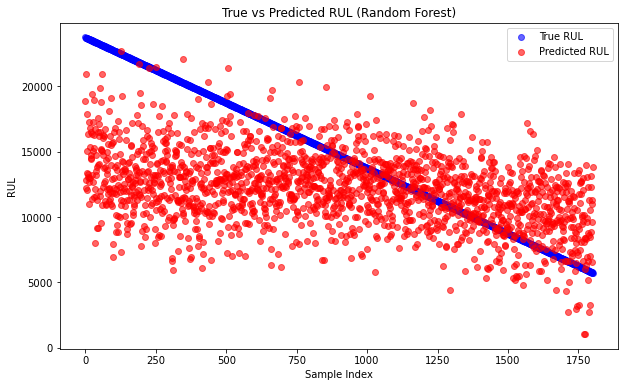

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='True RUL', alpha=0.6)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted RUL', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.title('True vs Predicted RUL (Random Forest)')
plt.legend()
plt.show()

# Experiment 2 (Scale Data + Random Forest)

Test MAE: 4362.304939094581
Test RMSE: 5266.005379888166
Test R²: -0.024788878096421163


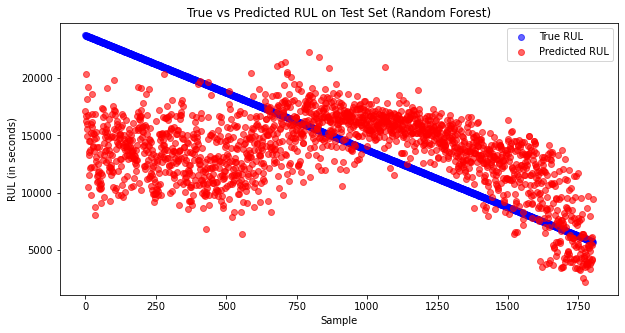

In [14]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_train = train_data.drop(columns=["RUL"])
y_train = train_data["RUL"]
X_test = test_data.drop(columns=["RUL"])
y_test = test_data["RUL"]

scale_data = True
if scale_data:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=20,
    max_features="sqrt",
    random_state=42
)

rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_r2 = r2_score(y_test, y_test_pred)

print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)
print("Test R²:", test_r2)

plt.figure(figsize=(10, 5))
plt.scatter(range(len(y_test)), y_test, color="blue", label="True RUL", alpha=0.6)
plt.scatter(range(len(y_test_pred)), y_test_pred, color="red", label="Predicted RUL", alpha=0.6)
plt.xlabel("Sample")
plt.ylabel("RUL (in seconds)")
plt.legend()
plt.title("True vs Predicted RUL on Test Set (Random Forest)")
plt.show()

# Experiment 3 (Feature Selection + Feature Scaling + Random Forest)

Validation MSE: 27630289.906963464, Validation R^2: 0.48085252464244665
Test MSE: 30270163.860176694, Test R^2: -0.11863029912857415


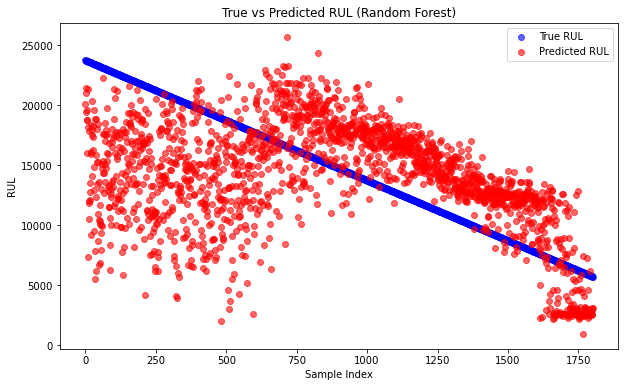

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Specify the features to use
features = ['Horz_STD', 'Horz_Spectral_Bandwidth', 'Horz_psd_mean', 'V_STD', 'Horz_psd_max', 'V_psd_mean', 'V_psd_max']

# Extract features and target variable from the training data and test data
X_train_full = train_data[features]
y_train_full = train_data["RUL"]

X_test_full = test_data[features]
y_test_full = test_data["RUL"]

X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test_full)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_val_pred = rf_model.predict(X_val_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

mse_val = mean_squared_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)
mse_test = mean_squared_error(y_test_full, y_test_pred)
r2_test = r2_score(y_test_full, y_test_pred)

print(f"Validation MSE: {mse_val}, Validation R^2: {r2_val}")
print(f"Test MSE: {mse_test}, Test R^2: {r2_test}")

# Visualize the predictions vs true RUL values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test_full)), y_test_full, color='blue', label='True RUL', alpha=0.6)
plt.scatter(range(len(y_test_pred)), y_test_pred, color='red', label='Predicted RUL', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.title('True vs Predicted RUL (Random Forest)')
plt.show()

# Exeriment 4 (Undersampling + Feature Scaling + Random Forest)

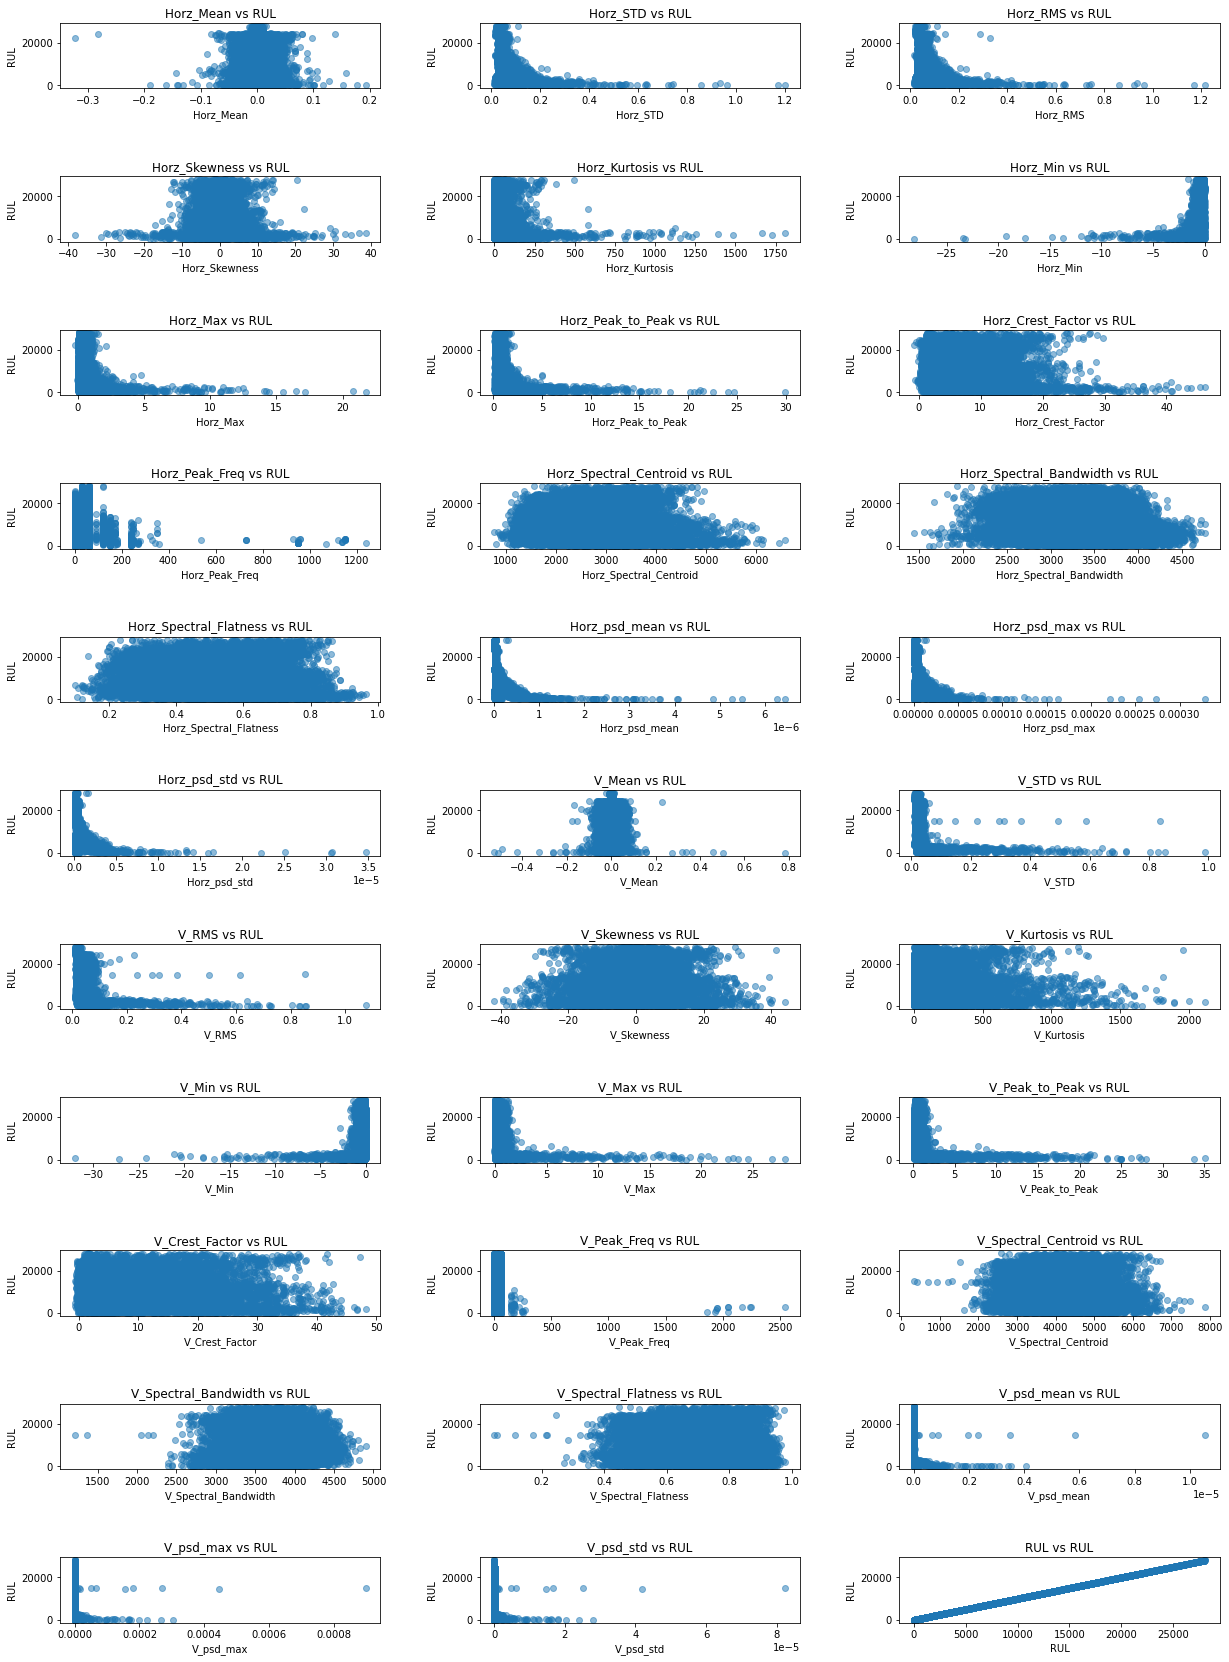

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('Training_set.csv')
df_test = pd.read_csv('test_set_b13.csv')

num_features = df.shape[1]
fig, axes = plt.subplots(nrows=11, ncols=3, figsize=(18, 24))
for i, feature in enumerate(df.columns):
    row = i // 3
    col = i % 3
    axes[row, col].scatter(df[feature], df['RUL'], alpha=0.5)
    axes[row, col].set_title(f"{feature} vs RUL")
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel("RUL")
    
plt.tight_layout(pad=4.0)

Using under sampling to balance the data

Total RUL range: 28073.0
High RUL range: 5573.0
Target high RUL ratio: 0.19851814911124568
Target low RUL ratio: 0.8014818508887543
Original low RUL count: 11297
Original high RUL count: 975
Balanced dataset low RUL count: 3936
Balanced dataset high RUL count: 975


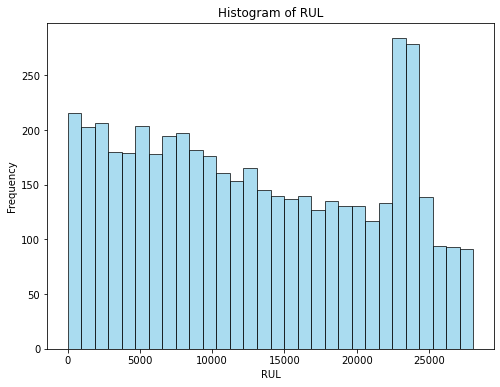

In [10]:
threshold = 22500
rul_min = df['RUL'].min()
rul_max = df['RUL'].max()
total_rul_range = rul_max - rul_min
high_rul_range = rul_max - threshold

target_high_ratio = high_rul_range / total_rul_range
target_low_ratio = 1 - target_high_ratio

high_rul_df = df[df['RUL'] >= threshold]
low_rul_df = df[df['RUL'] < threshold]

num_low_rul_to_retain = int(len(high_rul_df) * (target_low_ratio / target_high_ratio))

low_rul_sampled_df = low_rul_df.sample(n=num_low_rul_to_retain, random_state=42)
df_balanced = pd.concat([high_rul_df, low_rul_sampled_df], ignore_index=True)

df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)
df = df_balanced

print("Total RUL range:", total_rul_range)
print("High RUL range:", high_rul_range)
print("Target high RUL ratio:", target_high_ratio)
print("Target low RUL ratio:", target_low_ratio)
print("Original low RUL count:", len(low_rul_df))
print("Original high RUL count:", len(high_rul_df))
print("Balanced dataset low RUL count:", len(df_balanced[df_balanced['RUL'] < threshold]))
print("Balanced dataset high RUL count:", len(df_balanced[df_balanced['RUL'] >= threshold]))

plt.figure(figsize=(8, 6))
plt.hist(df['RUL'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("RUL")
plt.ylabel("Frequency")
plt.title("Histogram of RUL")
plt.show()

Scaling the features

In [11]:
target_column = 'RUL'
features_ = df.drop(columns=[target_column])
target_ = df[target_column]

features = df.drop(columns=[target_column])
target = df[target_column]
M = features.mean()
STD = features.std()
features = ((features - M) / STD)

features_test = df_test.drop(columns=[target_column])
target_test = df_test[target_column]
features_test = ((features_test - M) / STD)

Creating a Random Forest model and predicting the RUL values

RMSE on Test set: 4527.505008130413
R2 Score on Test set: 0.24248770654698304


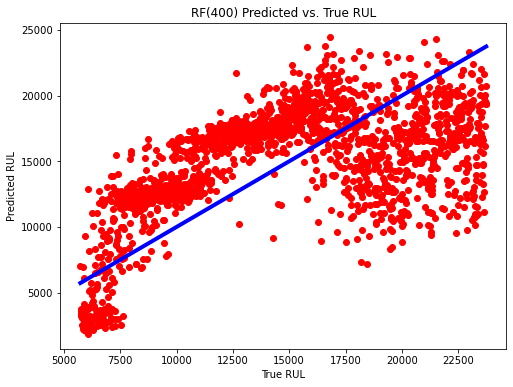

In [12]:
model = RandomForestRegressor(n_estimators=400, random_state=5)
model.fit(features, target)

y_test_pred = model.predict(features_test)
rmse = mean_squared_error(target_test, y_test_pred, squared=False)
r2 = r2_score(target_test, y_test_pred)
print(f"RMSE on Test set: {rmse}")
print(f"R2 Score on Test set: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(target_test, y_test_pred, color = "Red")
plt.plot([target_test.min(), target_test.max()], [target_test.min(), target_test.max()], color = "Blue", linewidth = 4)
plt.xlabel("True RUL")
plt.ylabel("Predicted RUL")
plt.title("RF(400) Predicted vs. True RUL")
plt.savefig("ActualVsPredicted.png")
plt.show()